# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import gray2rgb, label2rgb
from skimage.filters import threshold_multiotsu, threshold_otsu, try_all_threshold
from skimage.segmentation import slic
from skimage import data

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

In [49]:
def single_threshold_otsu(image):
    print("Computing single threshold:")
    thresh = threshold_otsu(image)
    binary = image > thresh

    _, axes = plt.subplots(ncols=3, figsize=(15, 5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()

Computing single threshold:


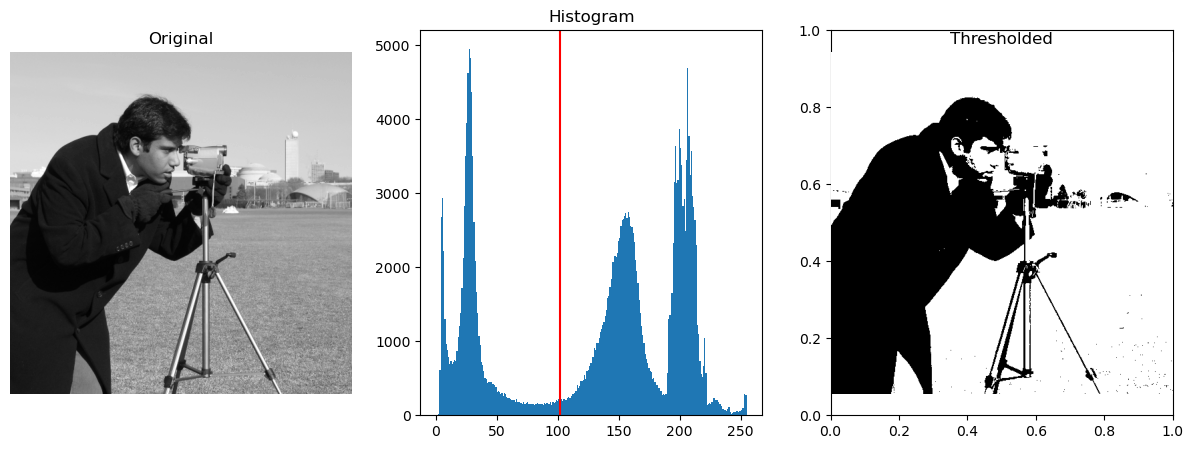

In [50]:
image = data.camera()

single_threshold_otsu(image)

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




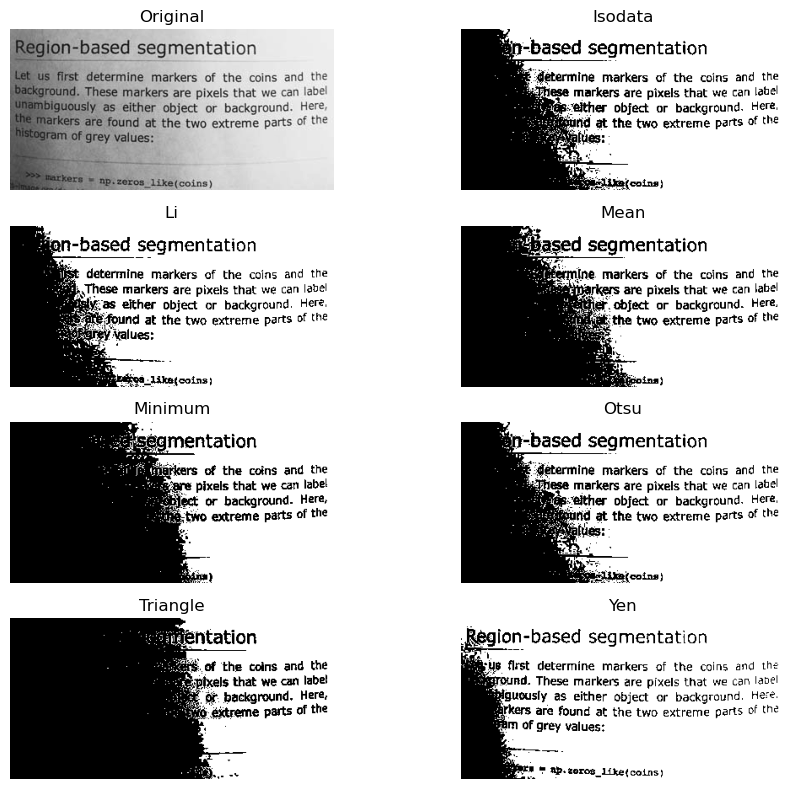

In [51]:
img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

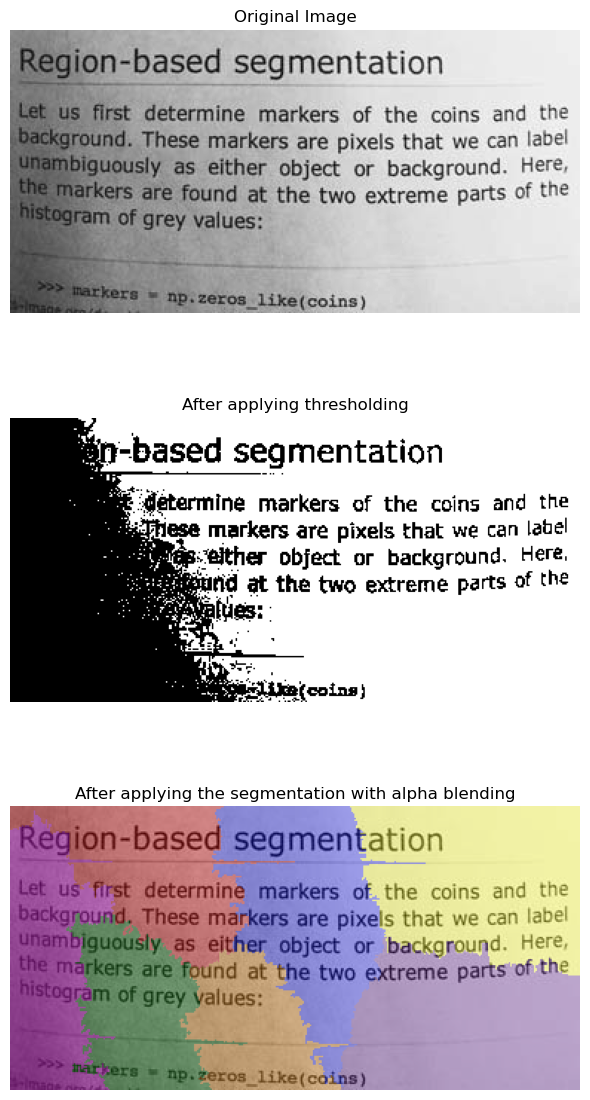

In [52]:
# Extra: Slide image for segmentation with alpha blending:

SEGMENTS = 10
ALPHA = 0.3

# Sklearn thresholding:
thresh = threshold_otsu(img)
binary = img > thresh

# Sklearn segmentation:
segments = slic(gray2rgb(img), n_segments=SEGMENTS)

segmented_image = label2rgb(segments, gray2rgb(img), alpha=ALPHA)

# Plot the result:
fig, axes = plt.subplots(nrows=3, figsize=(6, 12))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('After applying thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_image)
ax[2].set_title('After applying the segmentation with alpha blending')
ax[2].axis('off')

plt.tight_layout()
plt.show()

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

In [53]:
def multi_threshold_otsu(image):
    print("Computing multi threshold:")
    # Applying multi-Otsu threshold for the default value, generating
    # three classes.
    thresholds = threshold_multiotsu(image)

    # Using the threshold values, we generate the three regions.
    regions = np.digitize(image, bins=thresholds)

    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plotting the original image.
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    # Plotting the histogram and the two thresholds obtained from
    # multi-Otsu.
    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    # Plotting the Multi Otsu result.
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu result')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

Computing multi threshold:


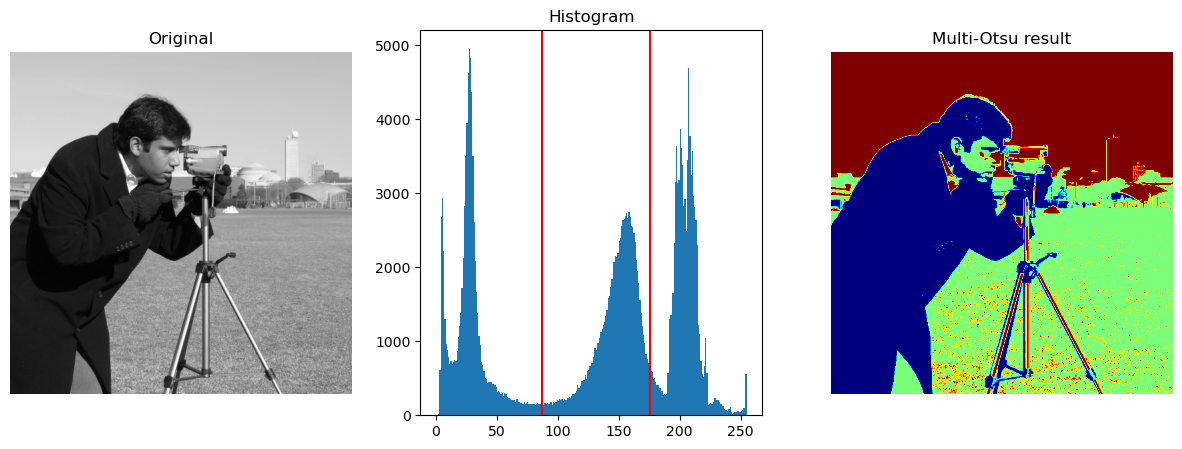

In [54]:
# The input image.
image = data.camera()

multi_threshold_otsu(image)

## Homework <a class="anchor" id="hw" ></a>

### a) Experiment with different images besides those provided in Colab, identify images with different backgrounds and styles, what are the limitations of single thresholding against the Otsu algorithm

For the Otsu algorothm testing, we'll use the following categories for testing:

1. **Natural Scene**:
   - Natural scenes encompass diverse backgrounds, such as landscapes or forests, with varying textures, lighting conditions, and color distributions. Testing with the Otsu algorithm computes an optimal threshold, enabling accurate segmentation of foreground objects from complex backgrounds without the need for manual intervention.
   
2. **Urban Scene**:
   - Urban scenes present a mixture of man-made structures, streets, vehicles, and natural elements against diverse backgrounds. The Otsu algorithm determines the optimal threshold to separate foreground objects from the background, ensuring precise segmentation even in images with intricate details and varied intensity distributions.

3. **Artwork**:
   - Artwork images often contain intricate patterns, textures, and colors, making them challenging for segmentation. Testing with the Otsu algorithm automatically identifies the threshold that maximizes inter-class variance, allowing for accurate segmentation of foreground elements from the background while preserving the integrity of the artwork.

4. **Animals**:
   - Images of animals feature subjects with distinct features against diverse backgrounds, requiring robust segmentation techniques. Testing with the Otsu algorithm computes the optimal threshold, facilitating precise segmentation of animals from their surroundings even in images with complex backgrounds and varying lighting conditions.

5. **Text Document**:
   - Text documents typically consist of black text on a light background or vice versa, posing challenges for accurate segmentation. Testing with the Otsu algorithm determines the threshold that effectively separates text from the background, ensuring accurate segmentation.

Computing single threshold:


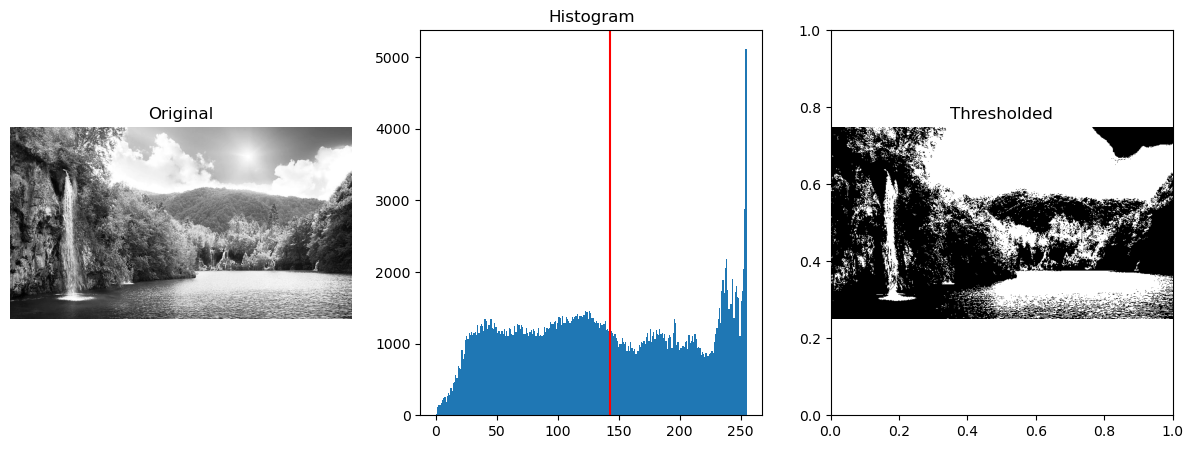

Computing multi threshold:


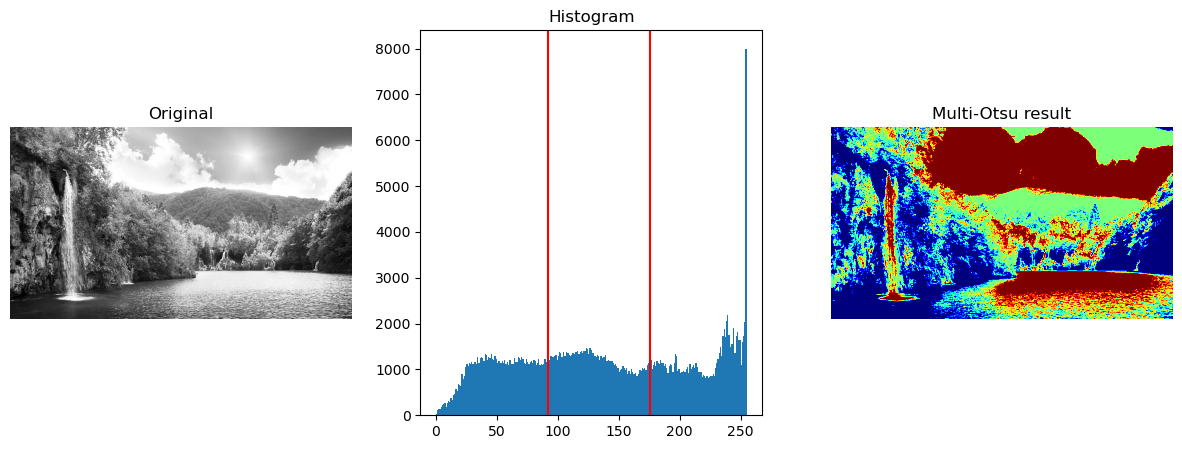

In [55]:
# Natural scene:
img = cv2.cvtColor(cv2.imread('data/natural_scene.jpg'), cv2.COLOR_BGR2GRAY)

single_threshold_otsu(img)
multi_threshold_otsu(img)

Single thresholding techniques, such as manual or fixed thresholding, struggle to accurately segment foreground objects from complex natural scenes. These techniques usually require manually setting a threshold value, which may not capture the variability in intensity across the image and leading to poor segmentation results, as we can see in the river. In contrast, the multi-Otsu algorithm excels in natural scenes by automatically identifying multiple thresholds to accommodate the diverse intensity distributions. This allows for finer segmentation, preserving intricate details and accurately delineating different elements within the scene.

Computing single threshold:


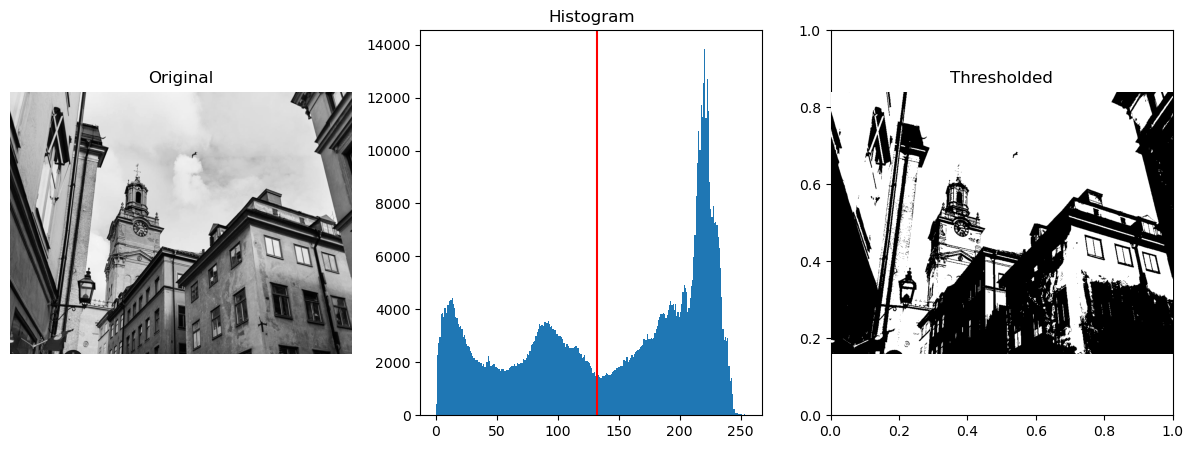

Computing multi threshold:


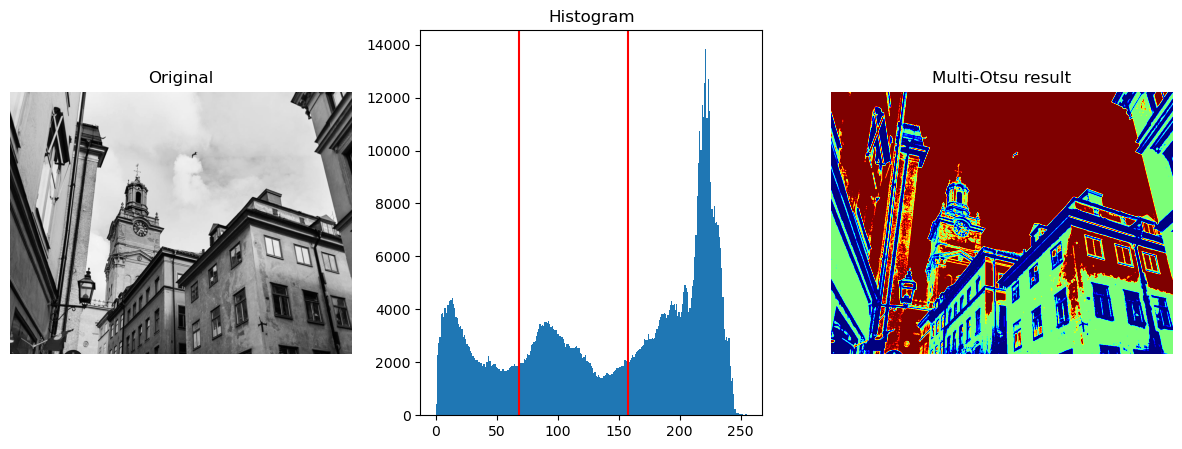

In [56]:
# Urban scene:
img = cv2.cvtColor(cv2.imread('data/urban_scene.jpg'), cv2.COLOR_BGR2GRAY)

single_threshold_otsu(img)
multi_threshold_otsu(img)

As we can see in the windows and details of the image, single thresholding methods fail to adequately segment urban scenes due to the presence of multiple objects with different intensity distributions. Setting a single threshold manually may not capture the nuances in intensity variations, resulting in incomplete or inaccurate segmentation. The multi-threshold algorithm is better suited for urban scenes as it can identify multiple thresholds to separate different intensity levels, leading to more accurate segmentation and improved delineation of urban structures and objects.

Computing single threshold:


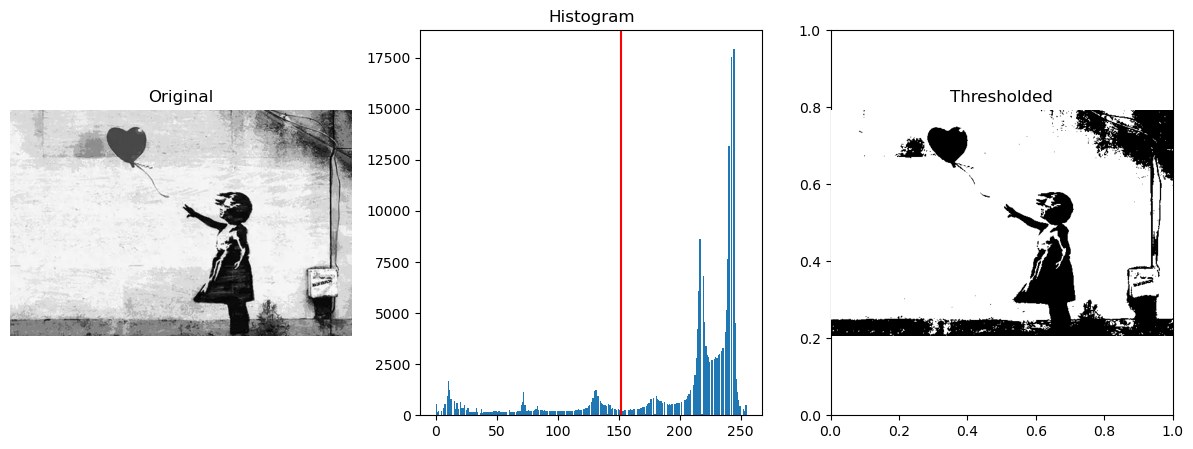

Computing multi threshold:


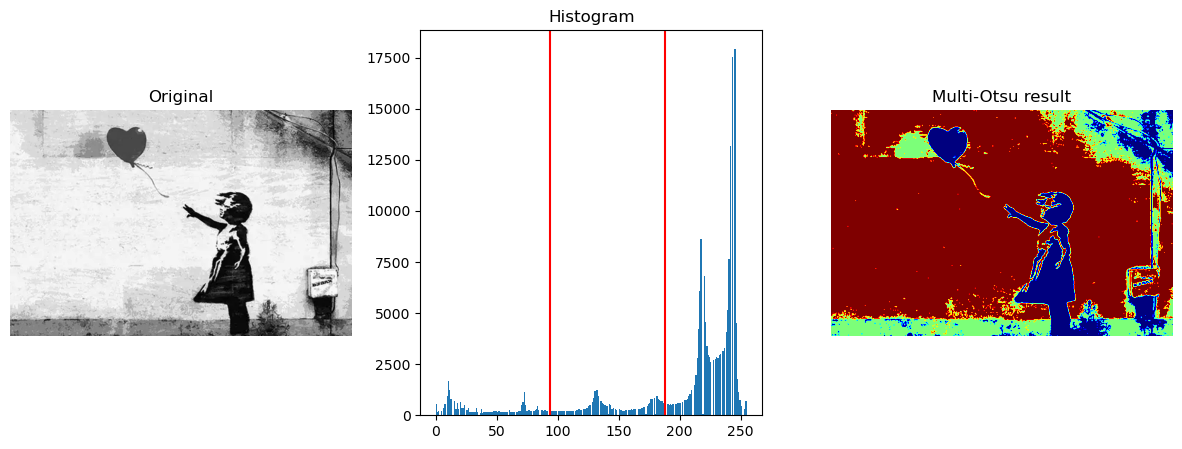

In [57]:
# Artwork (outdoors):
img = cv2.cvtColor(cv2.imread('data/artwork_outdoors.jpg'), cv2.COLOR_BGR2GRAY)

single_threshold_otsu(img)
multi_threshold_otsu(img)

In the case of using a binary image from Banksy or similar artists for artwork segmentation, the output similarity between single thresholding and multi-thresholding techniques can be attributed to the nature of the image itself. Artwork that is almost a binary image inherently contain only two intensity levels (maybe more if other colors are used), typically representing foreground and background. Therefore, both single thresholding and multi-thresholding methods may produce similar segmentation results as they aim to separate these two distinct regions.

Computing single threshold:


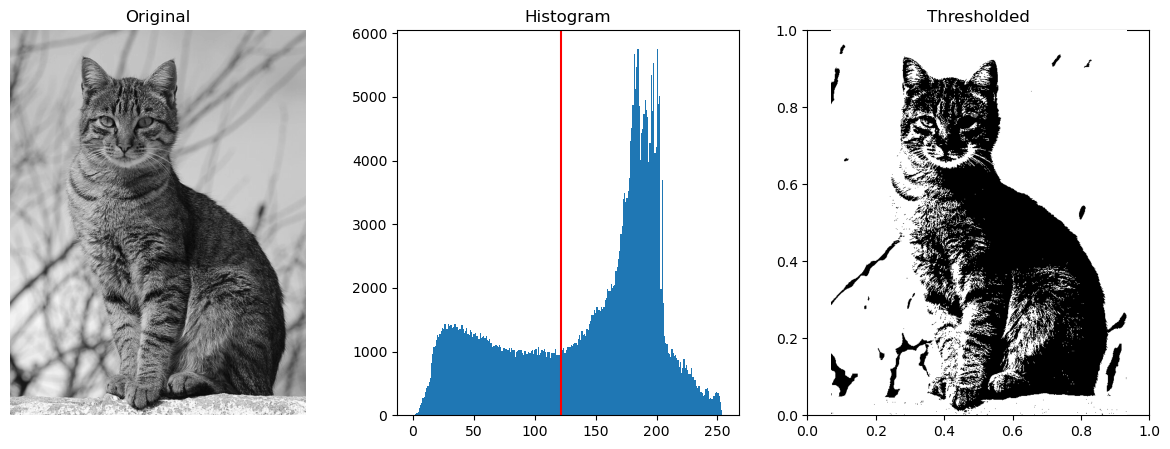

Computing multi threshold:


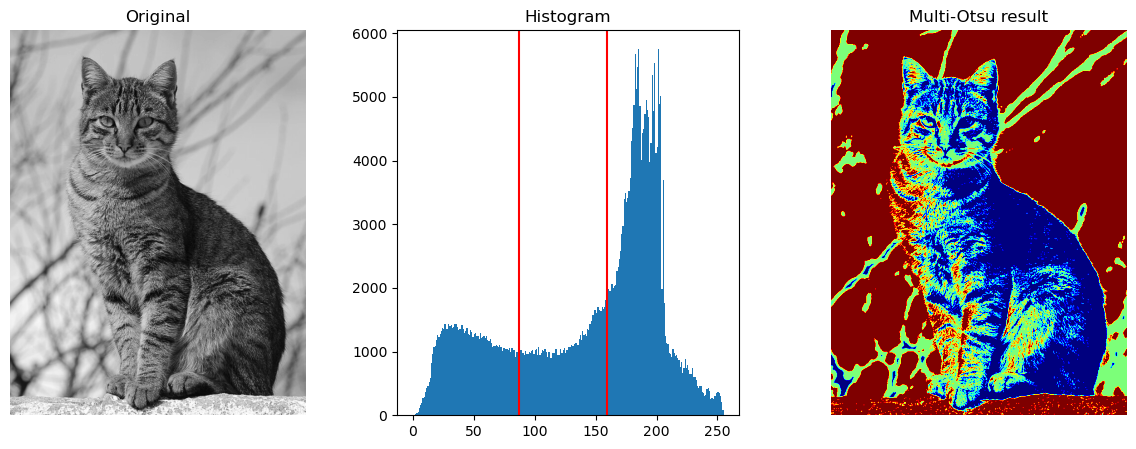

In [58]:
# Animal:
img = cv2.cvtColor(cv2.imread('data/animal.jpg'), cv2.COLOR_BGR2GRAY)

single_threshold_otsu(img)
multi_threshold_otsu(img)

In the case of the cat, single thresholding failed to accurately segment animals against the backgrounds, specifially the branches and other thin features. This can lead to potentially merging them with the background or losing important features. The multi-thresholding algorithm provides better segmentation of animals by identifying multiple thresholds to separate different intensity levels, allowing for more precise delineation of animal features and improved representation of the subject, even detecting changes in the levels of lightning itself.

Computing single threshold:


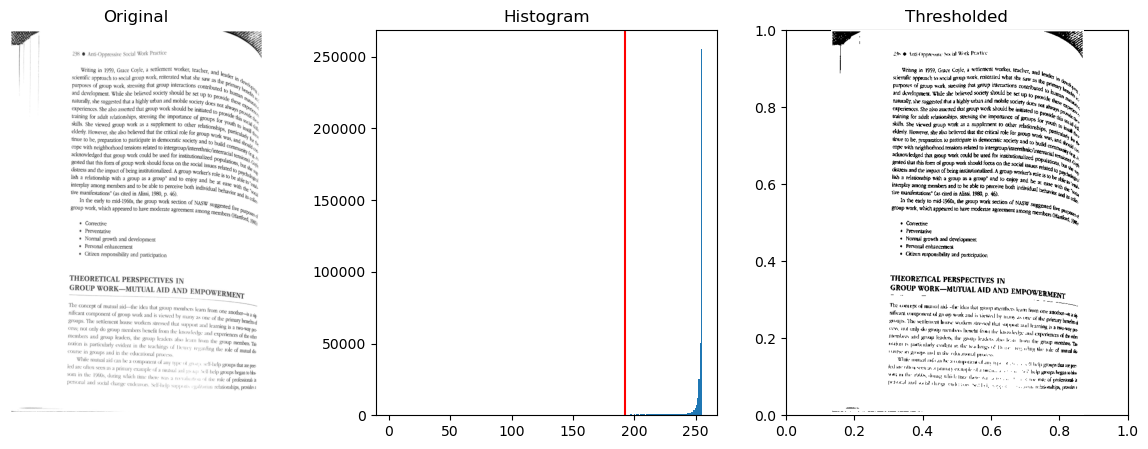

Computing multi threshold:


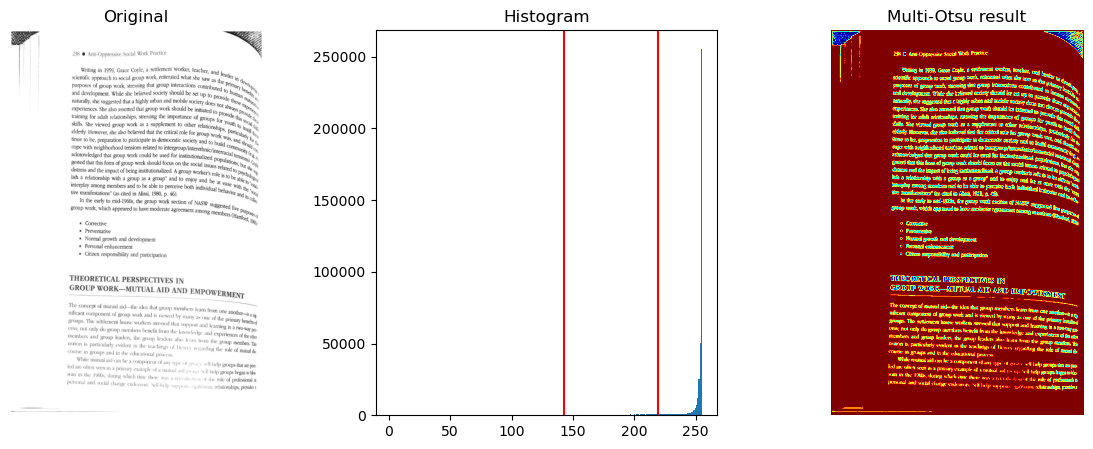

In [59]:
# Document:
img = cv2.cvtColor(cv2.imread('data/scanned_document.jpg'), cv2.COLOR_BGR2GRAY)

single_threshold_otsu(img)
multi_threshold_otsu(img)

Single thresholding techniques may oversimplify the segmentation of text documents, which can be seend in the last paragrahp, in which it merged some of the text with the background and failing to capture small text details such as the underline. The multi-thresholding algorithm excels in text document segmentation by automatically identifying multiple thresholds to separate text from the background, leading to more accurate extraction of text.